In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:

nbins = 100


fileset = 2




nfiles = 0




if fileset == 1 :
    input_filebase1 = 'output-run-kde-study-1d-v0c-res-sf-0.00/correlations'
    input_filebase2 = 'output-run-kde-study-1d-v0c-res-sf-0.50/correlations'
    input_filebase3 = 'output-run-kde-study-1d-v0c-res-sf-1.00/correlations'
    input_filebase4 = 'output-run-kde-study-1d-v0c-res-sf-1.50/correlations'

    nfiles = 4
    legend_labels = ['Resolution = 0.00',
                    'Resolution = 0.25',
                    'Resolution = 0.50',
                    'Resolution = 0.75']


if fileset == 2 :
    input_filebase1 = 'output-run-nn-study-nd-v0j-ndim1-res-sf-0.00/correlations'
    input_filebase2 = 'output-run-nn-study-nd-v0j-ndim1-res-sf-0.50/correlations'
    input_filebase3 = 'output-run-nn-study-nd-v0j-ndim1-res-sf-1.00/correlations'
    input_filebase4 = 'output-run-nn-study-nd-v0j-ndim1-res-sf-1.50/correlations'

    nfiles = 4
    legend_labels = ['Resolution = 0.00',
                    'Resolution = 0.25',
                    'Resolution = 0.50',
                    'Resolution = 0.75']

  
    
    

In [3]:
with open( '%s.npy' % input_filebase1, 'rb') as f :
    all1_points_df0 = np.load(f)
    all1_points_dr = np.load(f)
    all1_points_corr_array = np.load(f)



In [4]:
with open( '%s.npy' % input_filebase2, 'rb') as f :
    all2_points_df0 = np.load(f)
    all2_points_dr = np.load(f)
    all2_points_corr_array = np.load(f)


In [5]:
with open( '%s.npy' % input_filebase3, 'rb') as f :
    all3_points_df0 = np.load(f)
    all3_points_dr = np.load(f)
    all3_points_corr_array = np.load(f)


In [6]:

if nfiles > 3 :
    with open( '%s.npy' % input_filebase4, 'rb') as f :
        all4_points_df0 = np.load(f)
        all4_points_dr = np.load(f)
        all4_points_corr_array = np.load(f)

In [7]:
all1_points_df0 = np.absolute(all1_points_df0)
all2_points_df0 = np.absolute(all2_points_df0)
all3_points_df0 = np.absolute(all3_points_df0)

if nfiles > 3 :
    all4_points_df0 = np.absolute(all4_points_df0)

<function matplotlib.pyplot.show(close=None, block=None)>

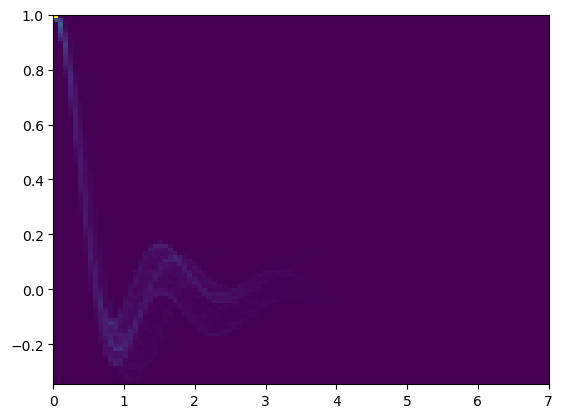

In [8]:
plt.hist2d(all1_points_df0,all1_points_corr_array,bins=[nbins,nbins])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

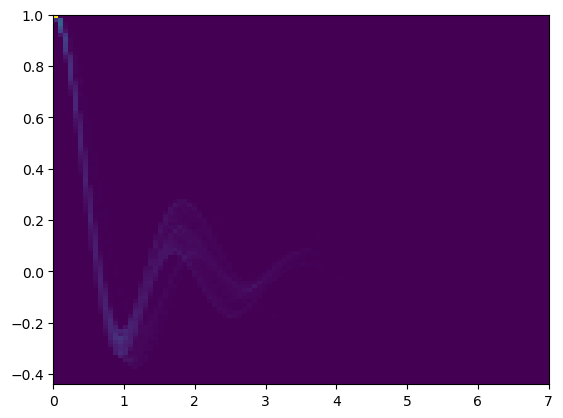

In [9]:
plt.hist2d(all2_points_df0,all2_points_corr_array,bins=[nbins,nbins])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

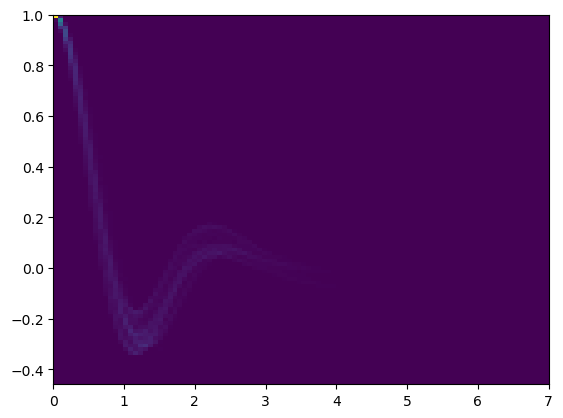

In [10]:
plt.hist2d(all3_points_df0,all3_points_corr_array,bins=[nbins,nbins])
plt.show

In [11]:
if nfiles > 4 :

    plt.hist2d(all4_points_df0,all4_points_corr_array,bins=[nbins,nbins])
    plt.show

In [12]:
def profile2d_from_hdata( axis, hist_data,  drawline=True, hlabel="", mstyle='o' ) :
    
        
    nybins = len(hist_data[0][0])
    print("number of y bins: %d" % nybins)

    nxbins = len(hist_data[0])
    print("number of x bins: %d" % nxbins)



    x_vals = np.zeros( nxbins )
    avey_vals = np.zeros( nxbins )
    rmsy_vals = np.zeros( nxbins )

    for xbi in range( nxbins ) :

        wsum = 0
        ywsum = 0
        yywsum = 0

        xval = 0.5 * ( hist_data[1][xbi] + hist_data[1][xbi+1] )
        #print(" xbin %d has center at %6.3f" % ( xbin_ind, xval ))

        for ybi in range( nybins-1 ) :  # don't include the y-bin that corresponds to rho=1 (event with itself)
            yval = 0.5 * ( hist_data[2][ybi] + hist_data[2][ybi+1] )
            bin_content = hist_data[0][xbi][ybi]
            wsum = wsum + bin_content
            ywsum = ywsum + yval * bin_content
            yywsum = yywsum + yval * yval * bin_content
            #print("  %3d : y = %6.3f  bin content = %7d" % (bi, yval, bin_content))

        ave_y = ywsum / wsum
        ave_yy = yywsum / wsum
        rms_y = ave_yy - ave_y * ave_y
        #print(" Ave y = %.3f, RMS y = %.3f" % ( ave_y, rms_y) )

        x_vals[xbi] = xval
        avey_vals[xbi] = ave_y
        rmsy_vals[xbi] = rms_y


    #for xbi in range( nxbins ) :
        #print("  %4d :  x = %7.3f   ave y = %7.3f  rms y = %7.3f" % ( xbi, x_vals[xbi], avey_vals[xbi], rmsy_vals[xbi]))

    if drawline :
        axis.plot( (hist_data[1][0], hist_data[1][-1]), (0,0) )  
    
    axis.errorbar( x_vals, avey_vals, yerr=rmsy_vals, marker='%s' % mstyle, label=hlabel)
    

    
    plt.show
    

    

In [13]:
def profile2d( axis, xvals, yvals, hbins, hrange, drawhist=True, drawline=True, hlabel="" ) :
    
    hist_data = axis.hist2d( xvals, yvals, bins=hbins, range=hrange)
    
    if not drawhist :
        axis.cla()
        axis.plot((0),(0))
        axis.set_xlim(hrange[0])
        axis.set_ylim(hrange[1])
    
    profile2d_from_hdata( axis, hist_data, drawline, hlabel )
    

number of y bins: 100
number of x bins: 100
number of y bins: 100
number of x bins: 100
number of y bins: 100
number of x bins: 100


/tmp/ipykernel_3443223/3362463102.py:33: RuntimeWarning: invalid value encountered in scalar divide
  ave_y = ywsum / wsum
/tmp/ipykernel_3443223/3362463102.py:34: RuntimeWarning: invalid value encountered in scalar divide
  ave_yy = yywsum / wsum
/tmp/ipykernel_3443223/3362463102.py:33: RuntimeWarning: invalid value encountered in scalar divide
  ave_y = ywsum / wsum
/tmp/ipykernel_3443223/3362463102.py:34: RuntimeWarning: invalid value encountered in scalar divide
  ave_yy = yywsum / wsum
/tmp/ipykernel_3443223/3362463102.py:33: RuntimeWarning: invalid value encountered in scalar divide
  ave_y = ywsum / wsum
/tmp/ipykernel_3443223/3362463102.py:34: RuntimeWarning: invalid value encountered in scalar divide
  ave_yy = yywsum / wsum


number of y bins: 100
number of x bins: 100


/tmp/ipykernel_3443223/3362463102.py:33: RuntimeWarning: invalid value encountered in scalar divide
  ave_y = ywsum / wsum
/tmp/ipykernel_3443223/3362463102.py:34: RuntimeWarning: invalid value encountered in scalar divide
  ave_yy = yywsum / wsum


<function matplotlib.pyplot.show(close=None, block=None)>

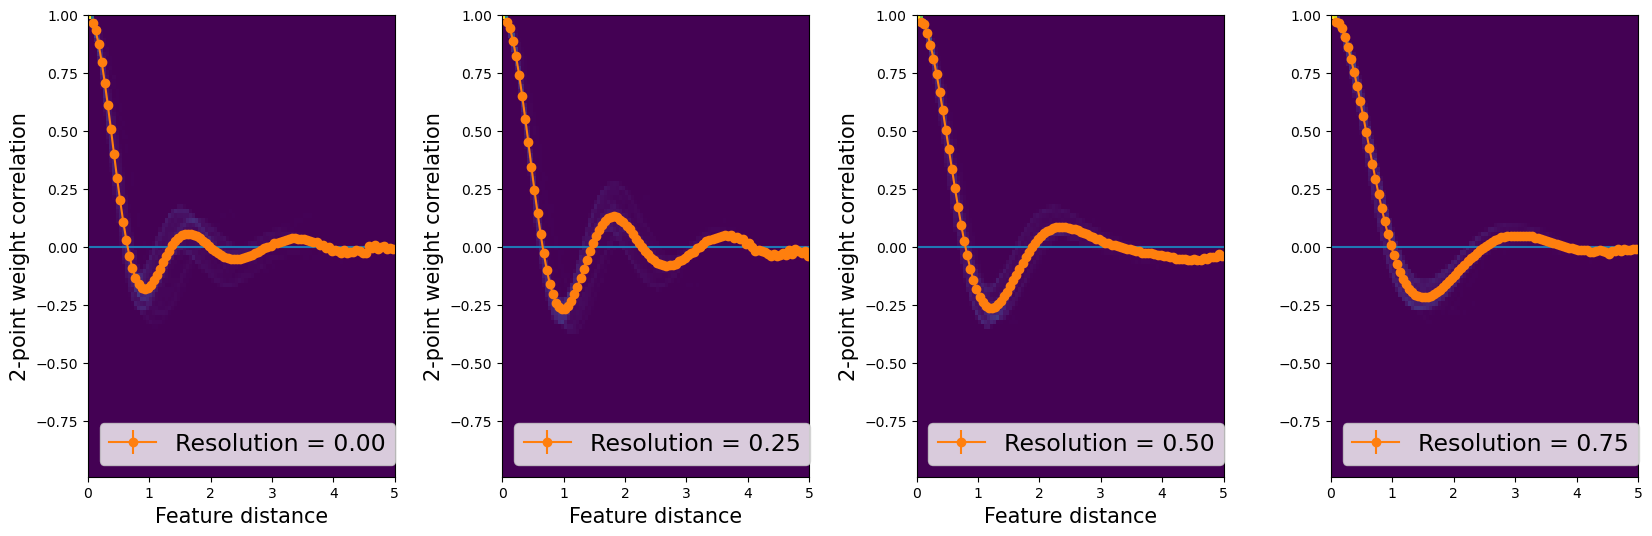

In [14]:
fig,ax = plt.subplots(1,nfiles,figsize=(20,6))


profile2d( ax[0], all1_points_df0, all1_points_corr_array, hbins=[nbins,nbins], hrange=([0,5],[-0.99,1]), drawhist=True,
         hlabel=legend_labels[0])
profile2d( ax[1], all2_points_df0, all2_points_corr_array, hbins=[nbins,nbins], hrange=([0,5],[-0.99,1]), drawhist=True,
         hlabel=legend_labels[1])
profile2d( ax[2], all3_points_df0, all3_points_corr_array, hbins=[nbins,nbins], hrange=([0,5],[-0.99,1]), drawhist=True,
         hlabel=legend_labels[2])

if nfiles > 3 :
    profile2d( ax[3], all4_points_df0, all4_points_corr_array, hbins=[nbins,nbins], hrange=([0,5],[-0.99,1]), drawhist=True,
         hlabel=legend_labels[3])

ax[0].set_xlabel('Feature distance', fontsize=15)
ax[0].set_ylabel('2-point weight correlation', fontsize=15)

ax[1].set_xlabel('Feature distance', fontsize=15)
ax[1].set_ylabel('2-point weight correlation', fontsize=15)

ax[2].set_xlabel('Feature distance', fontsize=15)
ax[2].set_ylabel('2-point weight correlation', fontsize=15)

ax[0].legend(loc='best', fontsize=17)
ax[1].legend(loc='best', fontsize=17)
ax[2].legend(loc='best', fontsize=17)
if nfiles > 3 :
    ax[3].legend(loc='best', fontsize=17)

plt.subplots_adjust( wspace=0.35 )

plt.show


number of y bins: 100
number of x bins: 100
number of y bins: 100
number of x bins: 100
number of y bins: 100
number of x bins: 100
number of y bins: 100
number of x bins: 100


/tmp/ipykernel_3443223/3362463102.py:33: RuntimeWarning: invalid value encountered in scalar divide
  ave_y = ywsum / wsum
/tmp/ipykernel_3443223/3362463102.py:34: RuntimeWarning: invalid value encountered in scalar divide
  ave_yy = yywsum / wsum
/tmp/ipykernel_3443223/3362463102.py:33: RuntimeWarning: invalid value encountered in scalar divide
  ave_y = ywsum / wsum
/tmp/ipykernel_3443223/3362463102.py:34: RuntimeWarning: invalid value encountered in scalar divide
  ave_yy = yywsum / wsum
/tmp/ipykernel_3443223/3362463102.py:33: RuntimeWarning: invalid value encountered in scalar divide
  ave_y = ywsum / wsum
/tmp/ipykernel_3443223/3362463102.py:34: RuntimeWarning: invalid value encountered in scalar divide
  ave_yy = yywsum / wsum
/tmp/ipykernel_3443223/3362463102.py:33: RuntimeWarning: invalid value encountered in scalar divide
  ave_y = ywsum / wsum
/tmp/ipykernel_3443223/3362463102.py:34: RuntimeWarning: invalid value encountered in scalar divide
  ave_yy = yywsum / wsum


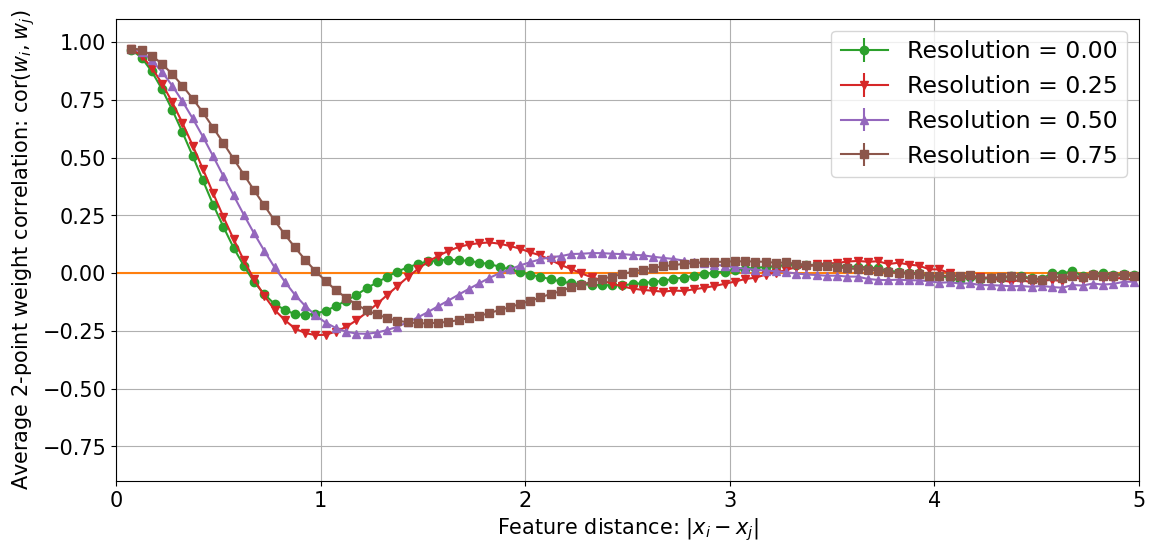

In [15]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

fs = 6

fig,ax = plt.subplots(1,1,figsize=(2.2*fs,fs))

hd1 = ax.hist2d(all1_points_df0, all1_points_corr_array, bins=[nbins,nbins], range=([0,5],[-0.9,1]))
hd2 = ax.hist2d(all2_points_df0, all2_points_corr_array, bins=[nbins,nbins], range=([0,5],[-0.9,1]))
hd3 = ax.hist2d(all3_points_df0, all3_points_corr_array, bins=[nbins,nbins], range=([0,5],[-0.9,1]))
if nfiles > 3 :
    hd4 = ax.hist2d(all4_points_df0, all4_points_corr_array, bins=[nbins,nbins], range=([0,5],[-0.9,1]))

ax.cla()
ax.plot((0),(0))
ax.set_xlim([0,5])
ax.set_ylim([-0.9,1.1])

ax.grid(True)



profile2d_from_hdata( ax, hd1, hlabel=legend_labels[0], mstyle='o')
profile2d_from_hdata( ax, hd2, drawline=False, hlabel=legend_labels[1], mstyle='v')
profile2d_from_hdata( ax, hd3, drawline=False, hlabel=legend_labels[2], mstyle='^')
if nfiles > 3 :
    profile2d_from_hdata( ax, hd4, drawline=False, hlabel=legend_labels[3], mstyle='s')

ax.legend(loc='best', fontsize=17)

ax.set_xlabel('Feature distance: $|x_i - x_j|$', fontsize=15)
ax.set_ylabel('Average 2-point weight correlation: cor($w_i,w_j$)', fontsize=15)

plt.savefig( 'paper-plots/weight-correlation-vs-distance-1d-set%d.pdf' % fileset , bbox_inches='tight' )

